# Phase 3 Project

# **SyriaTel Customer Churn Prediction**

**Author** - [Neville Ngenzi](https://github.com/NgenziNevilleMativo)

----

## Introduction


### Overview

The telecommunication industry plays a crucial role in our daily lives, with media transmission being a standout amongst the most developing sectors. Operators need to find and execute new methods to remain at the forefront of this growth.

While acquiring new customers is important, telecommunication companies recognize that retaining existing ones is even more crucial. Customer churn, is defined as the rate at which subscribers switch to competitors, is a major concern in this industry.

Customer churn prediction or churn analysis involves using data mining techniques to identify patterns in customer data that can predict churn. Techniques like hybrid models, decision trees, and Bayesian applications have been employed to address this challenge. This study focuses on developing a hybrid predictive model for churn prediction and feature selection, enabling service providers to predict customer churn propensity and eliminate reliance on traditional methods like questionnaires.

The project is structured as follows:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Exploratory Data Analysis
5. Modelling
6. Model Evaluation
7. Recommendations and Conclusions

 ## 1. Business Understanding

### Business problem


Customer churn, the rate at which customers discontinue their services with a company, poses a significant challenge for telecom companies like SyriaTel. This issue impacts revenue, marketing expenses, and brand perception. For SyriaTel specifically, customer churn directly affects financial stability and market standing. Losing customers not only reduces immediate income but also escalates the expenses associated with acquiring new ones. 

Additionally, high churn rates can tarnish SyriaTel's reputation, making it harder to attract new clients. Given the fierce competition in the telecom sector, understanding the reasons behind customer departures, whether related to pricing, service quality, customer experience, or competitor tactics, is crucial. This comprehension enables SyriaTel to identify and rectify underlying problems, ultimately mitigating further churn and fostering long-term profitability and customer loyalty.

#### Objectives

The objective of this project is to develop a hybrid predictive model for churn prediction and feature selection in the telecommunication industry. By leveraging data mining techniques, the aim is to identify patterns in customer data that can accurately predict churn behavior. The ultimate goal is to enable service providers to proactively identify customers at risk of churn and implement targeted retention strategies to mitigate customer loss.



## 2. Data Understanding

The dataset titled "Churn in Telecom" sourced from Kaggle provides details on customer activity, specifically whether they have terminated their subscription with the telecom company. The primary aim of this dataset is to construct predictive models that aid the telecom industry in minimizing financial losses attributed to short-term customer retention. 

Data understanding is dedicated to familiarizing ourselves with the dataset and identifying potential data quality issues. Additionally, initial exploratory data analysis will be conducted to uncover initial insights into the dataset's characteristics.

In [370]:
# Import modules and Packages

# Data Handling and Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Filter future Warnings
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

# Model Training and Evaluation
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight

from sklearn.pipeline import Pipeline

In [371]:
# Load the data into panda dataframe
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

# Previewing the first few rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [372]:
# Number of Rows and Columns
df.shape

(3333, 21)

In [373]:
# Number of Elements in Dataframe
df.size

69993

In [374]:
# General Overview of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

This dataset comprises 3333 data records and 21 columns. However, a thorough examination of each column is necessary to detect anomalies, particularly those in the form of placeholder values or unique characters. 

Among the columns, four (4) are categorized as objects, eight (8) as integers, eight (8) as floats, and one (1) as boolean. The column designated as "churn" serves as our target variable, while the remaining columns are treated as features. This dataset offers a diverse range of information, encompassing customer demographics, service plans, call metrics, and churn indicators.

Based on the general information provided above, it is observed that the majority of column names consist of two or more words. To enhance accessibility, it is imperative to eliminate the white spaces within the column names. Thus, we must proceed with renaming the columns by replacing white spaces with underscores '_' for improved readability and usability.

In [375]:
# Rename column titles to remove spaces
cols = []
for col in df.columns:
    col = col.replace(' ', '_')
    cols.append(col)

# Update DataFrame columns with modified column names
df.columns = cols
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [376]:
# Numerical Columns
print(f"Numerical Columns: {df.select_dtypes(include='number').columns}\n")

# Categorical Columns
print(f"Categorical Columns: {df.select_dtypes(include='object').columns}")

Numerical Columns: Index(['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls'],
      dtype='object')

Categorical Columns: Index(['state', 'phone_number', 'international_plan', 'voice_mail_plan'], dtype='object')


In [377]:
# General statistics of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area_code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number_vmail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total_day_minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total_day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total_day_charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total_eve_minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total_eve_calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total_eve_charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total_night_minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


Summary of Features in the Datset

- State: The state the customer lives in
- Account Length: The number of days the customer has had an account.
- Area Code: The area code of the customer
- Phone Number: The phone number of the customer
- International Plan: True if the customer has the international plan, otherwise false.
- Voice Mail Plan: True if the customer has the voice mail plan, otherwise false.
- Number Vmail Messages: the number of voicemails the customer has sent.
- Total Day Minutes: total number of minutes the customer has been in calls during the day.
- Total Day Calls: total number of calls the user has done during the day.
- Total Day Charge: total amount of money the customer was charged by the Telecom company for calls during the day.
- Total Eve Minutes: total number of minutes the customer has been in calls during the evening.
- Total Eve Calls: total number of calls the customer has done during the evening.
- Total Eve Charge: total amount of money the customer was charged by the Telecom company for calls during the evening.
- Total Night Minutes: total number of minutes the customer has been in calls during the night.
- Total Night Calls: total number of calls the customer has done during the night.
- Total Night Charge: total amount of money the customer was charged by the Telecom company for calls during the night.
- Total Intl Minutes: total number of minutes the user has been in international calls.
- Total Intl Calls: total number of international calls the customer has done.
- Total Intl Charge: total amount of money the customer was charged by the Telecom company for international calls.
- Customer Service Calls: number of calls the customer has made to customer service.
- Churn: true if the customer terminated their contract, otherwise false

3. Data Cleaning

We will examine the dataframe for any anomalies. It's essential to thoroughly analyze the data to identify missing values, including placeholder or distinct values.

In [378]:
# Check for missing values (nan) in the dataframe
df.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [379]:
# Check for duplicates in the dataframe
df.duplicated().sum()

0

Given the information provided, it's clear that our dataset lacks any null values or any duplicates, making the need for an imputer unnecessary.

Some columns within the dataset lack meaningful insights into customer behavior, such as the phone number column. Predicting customer churn does not require consideration of phone numbers, rendering this column irrelevant.

In [380]:
# Drop the column labeled "phone number" from the DataFrame.
df.drop(['phone_number'], axis=1, inplace=True)

4. Exploratory Data Analysis

Exploratory Data Analysis (EDA) involves thoroughly examining the data using various analytical techniques such as univariate, bivariate, and multivariate analysis.

The purpose of this data exploration is to uncover potential correlations among the features and understand the distribution of variables. These insights are crucial for effective feature engineering and model building.

This phase delves into the dataset to uncover patterns, establish connections between variables, spot outliers, and gather insights before employing any modeling or statistical methods.

4.1 Univariate EDA

Univariate data analysis focuses on analyzing individual variables. In our project, this entails studying each feature's distribution in the dataset to comprehend its properties and detect any anomalies, such as outliers.

We initiate this process by scrutinizing the target variable column "churn" to understand its distribution. This categorical variable indicates whether a client is likely to churn, denoted by boolean values True and False.

In [381]:
#  Providing a summary of the distribution of the churn values in the dataframe
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

Upon inspection, the column shows no missing values. The presence of 2,850 false values denotes customers who stayed, while 483 true values represent those who left the company.

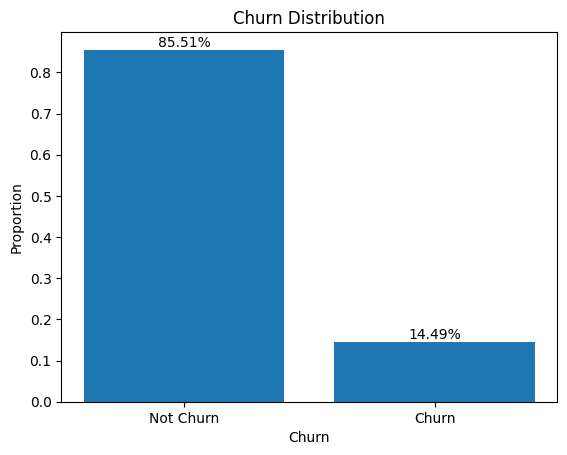

In [382]:
# Calculate churn distribution
d = df.churn.value_counts(normalize=True)

# Plot churn distribution
plt.bar(d.index, d.values)

# Annotate bars with representative values
for i in range(len(d)):
    plt.text(i, d.values[i], f"{d.values[i]:.2%}", ha='center', va='bottom')

plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.show()

Let's delve deeper into our target variable. Out of the 3,333 customers in our dataset, 2,850 remained with us, while 283 churned, indicating a class imbalance issue. This imbalance, underscored by the termination of contracts by 483 customers (14.5% of our base), needs addressing before modeling to prevent inaccurate predictions. Despite no missing values, the class imbalance is evident, with 85.51% in the false class and 14.49% in the true class. Rectifying this imbalance is crucial for accurate modeling.

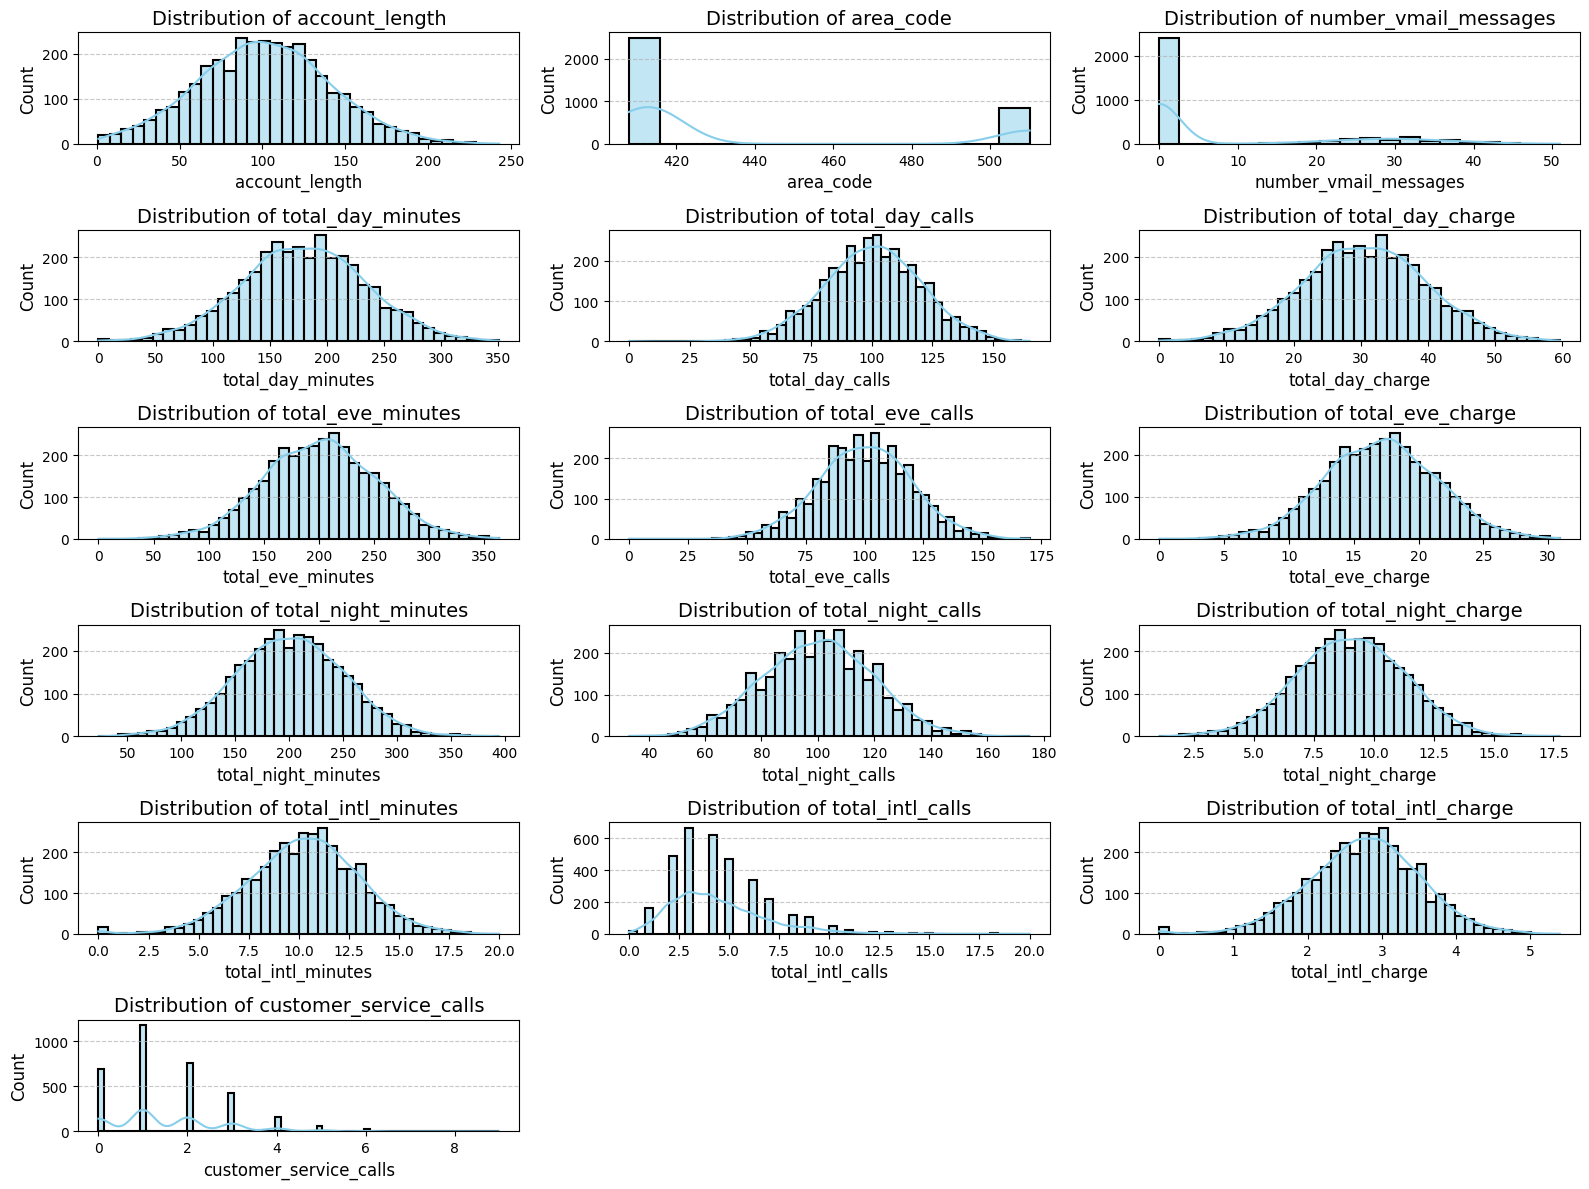

In [383]:
# Get the numeric columns using select_dtypes
numeric_columns = df.select_dtypes(include='number').columns
numeric_features = list(numeric_columns)

# Calculate the number of rows and columns for subplots
nrows = (len(numeric_features) - 1) // 3 + 1
ncols = min(3, len(numeric_features))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 12))

# Flatten axes if necessary
axes = axes.flatten() if nrows > 1 else [axes]

# Plot numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(df[feature], kde=True, ax=ax, color='skyblue', edgecolor='black', linewidth=1.5)
    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove empty subplots
if len(numeric_features) < nrows * ncols:
    for i in range(len(numeric_features), nrows * ncols):
        fig.delaxes(axes[i])

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()


The predictor variables, including account length, total day minutes, total day calls, total eve minutes, total eve calls, total day charge, total eve charge, total night minutes, total night calls, total night charge, and total intl minutes, appear to follow a fairly normal distribution. Meanwhile, total intl calls and customer service calls exhibit a normal distribution but with a right skew. The area code column is discrete and categorical. Regarding the number of vmail messages, the majority of entries are zero, while the remaining values appear to exhibit a platykurtic distribution.

In [384]:
def plot_categorical_distribution(df, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(11, 7))
    sns.countplot(x=feature, data=df, color='skyblue', order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()



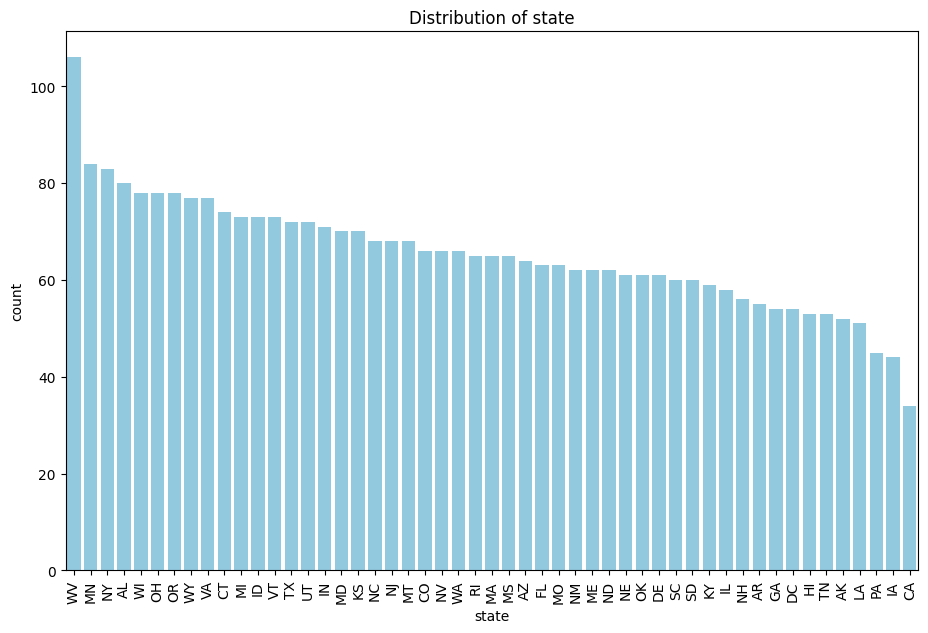

In [385]:
plot_categorical_distribution(df, 'state')

Most of the customers are from West Virginia,Minnesota,NewYork,Alabama and Wisconsin

In [386]:
df['international_plan'].value_counts()

no     3010
yes     323
Name: international_plan, dtype: int64

From above, there are only 'yes' and 'no' responses in this column with no any other unique entry. This means that information stored in this column is whether a client has an international plan or not.

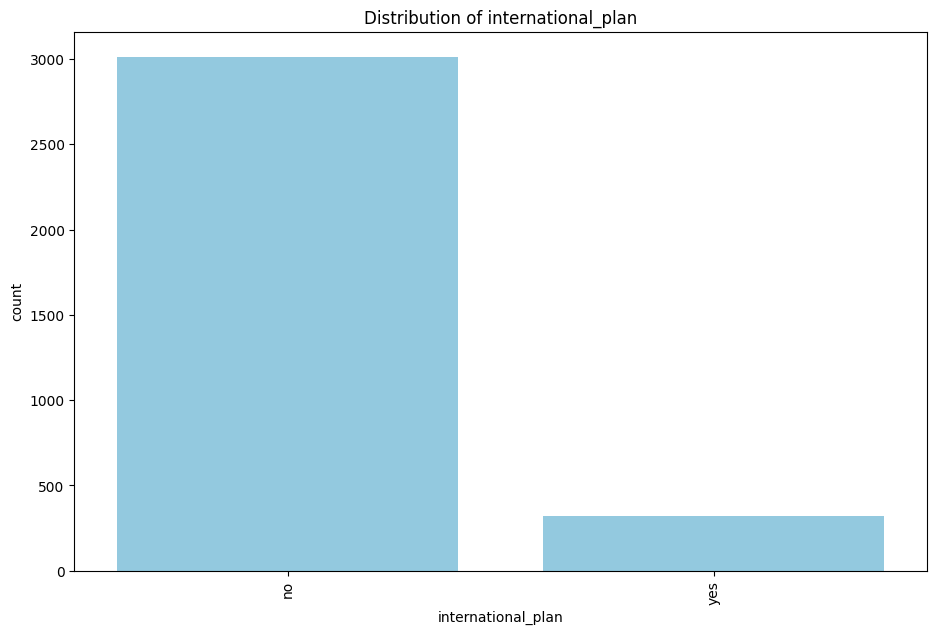

In [387]:
plot_categorical_distribution(df, 'international_plan')

Out of 3333 customers, only 323 of them have an international plan, that's about 0.1%.

Now lets look into the Voice Mail Plan Column. Given this column is of object type same as the international_plan column, we will repeat the same.

In [388]:
df['voice_mail_plan'].value_counts()

no     2411
yes     922
Name: voice_mail_plan, dtype: int64

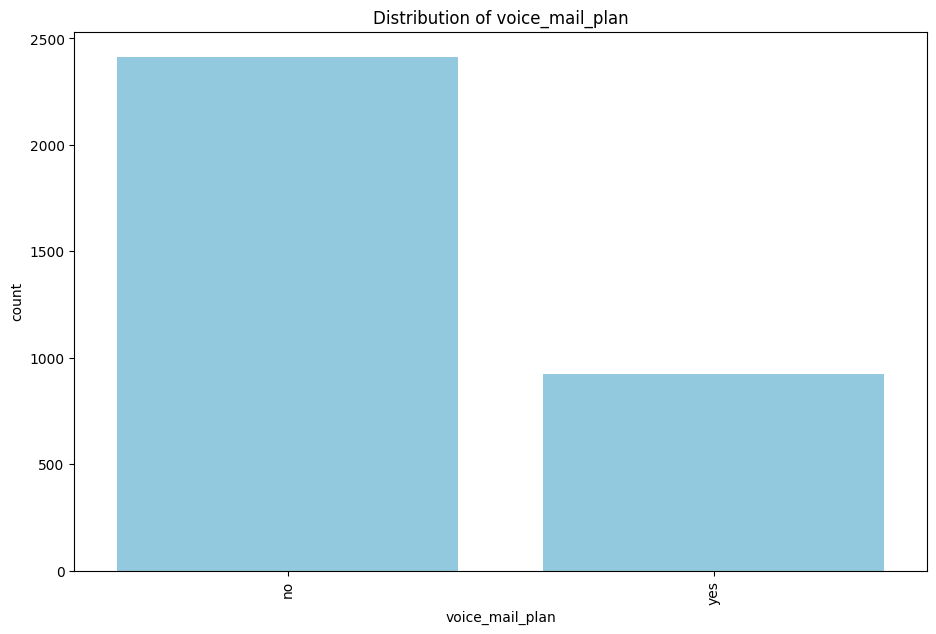

In [389]:
plot_categorical_distribution(df, 'voice_mail_plan')

Out of 3333 customers, only 922 customers have a voicemail plan, that's about 0.3%.

Addressing Outliers

Outliers have the potential to disproportionately affect the effectiveness of predictive models, introducing noise and distorting the training process. By excluding outliers that lie beyond 3 standard deviations, we enhance the models' capacity to identify underlying patterns and generate more precise predictions on unseen data.

we will conduct a deeper examination of the data to detect outliers, a critical step in comprehending the distribution of values across various columns. Our analysis will primarily target numeric data. Outliers have the potential to notably influence the efficacy of machine learning models, thereby affecting the feature engineering process.

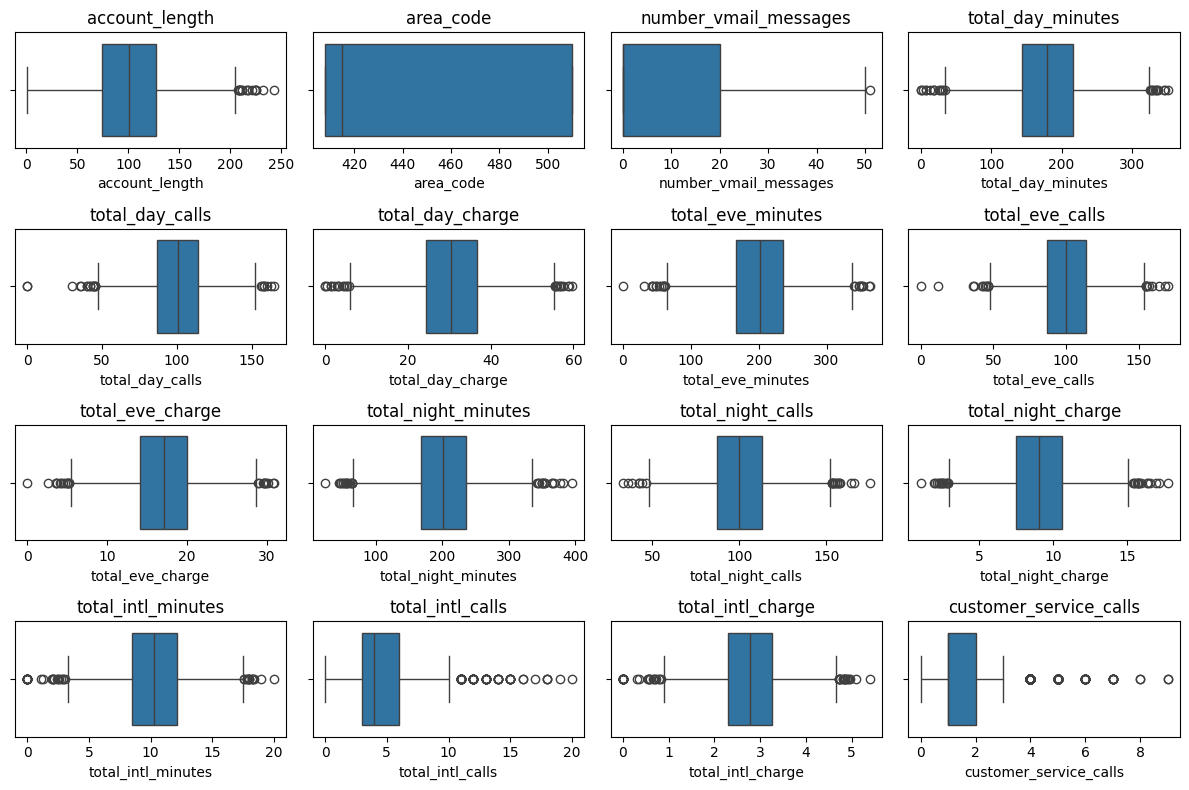

In [390]:
# Visualizing the summary statistics
# Select numerical columns for visualization
numeric_cols = ['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls']


# Create box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

From the boxplots, it's evident that many columns exhibit numerous outliers, posing potential challenges for machine learning models like k-nearest neighbors (knn). However, these outliers in our dataset contain valuable insights crucial for our models. Therefore, we won't discard this data, as it holds significant importance for our analysis.

Bivariate Analysis

Bivariate analysis involves examining the relationship or association between two variables in a dataset. It allows us to explore how changes in one variable are related to changes in another variable.

We will conduct bivariate analysis to understand the relationship between various features (such as state, international plan, and voice mail plan) and the target variable, which is customer churn. By analyzing these relationships, we aim to identify correlations between categorical columns and the customer churn rate. This helps us gain insights into how different factors may influence the likelihood of customers churning.

In [391]:
#Checking the distribution of categorical features based on churn rate
def plot_categorical_distribution(df, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(10, 4))
    churn_counts = df.groupby(feature)["churn"].sum().sort_values(ascending=False)
    top_10_categories = churn_counts.head(10).index.tolist()
    sns.countplot(x=feature, hue="churn", data=df, order=top_10_categories)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()


State

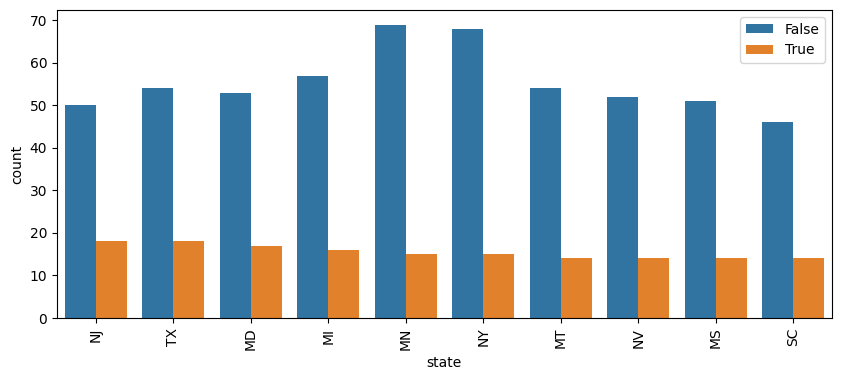

In [392]:
plot_categorical_distribution(df, 'state')

Of all the customers that churned, majority are from Texas, New Jersey, Maryland,Miami and NewYork.

International Plan

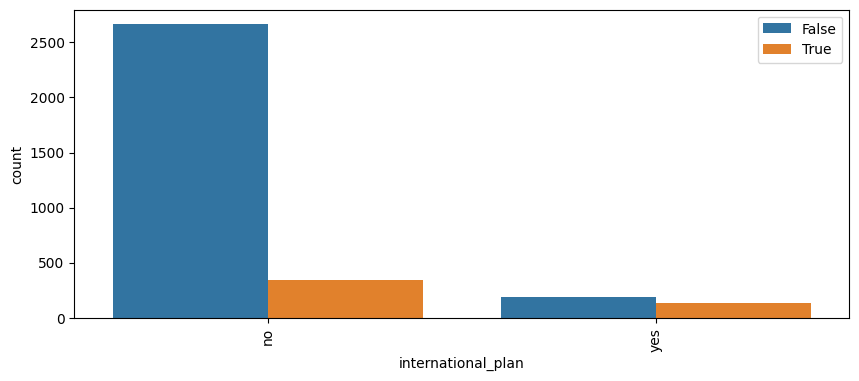

In [393]:
plot_categorical_distribution(df, 'international_plan')

In the case of the international plan, a notably higher percentage of customers who opted for the plan churned (42.4%) in contrast to those who did not subscribe (11.5%). This disparity suggests a potential correlation between subscribing to the international plan and an increased probability of churn. Such findings may indicate underlying issues associated with the international plans, possibly leading to dissatisfaction among customers.

The majority of customers who churned did not have an international plan.

Voicemail Plan

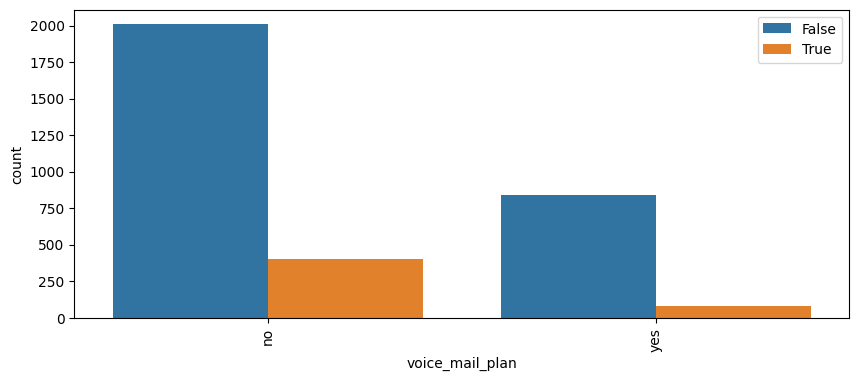

In [394]:
plot_categorical_distribution(df, 'voice_mail_plan')

In the case of the voice mail plan, there's a notable difference in churn rates between customers who subscribed (8.7%) and those who didn't (16.7%). This discrepancy implies a potential correlation between subscribing to the voice mail plan and a reduced probability of churning.

The majority of customers who churned did not have an voicemail plan.

Multi-variate Analysis

Multivariate analysis involves exploring the relationship between multiple variables simultaneously, particularly examining their relationship with the target variable, customer churn. By employing a correlation matrix, we can identify the relationships between different variables in the dataset.

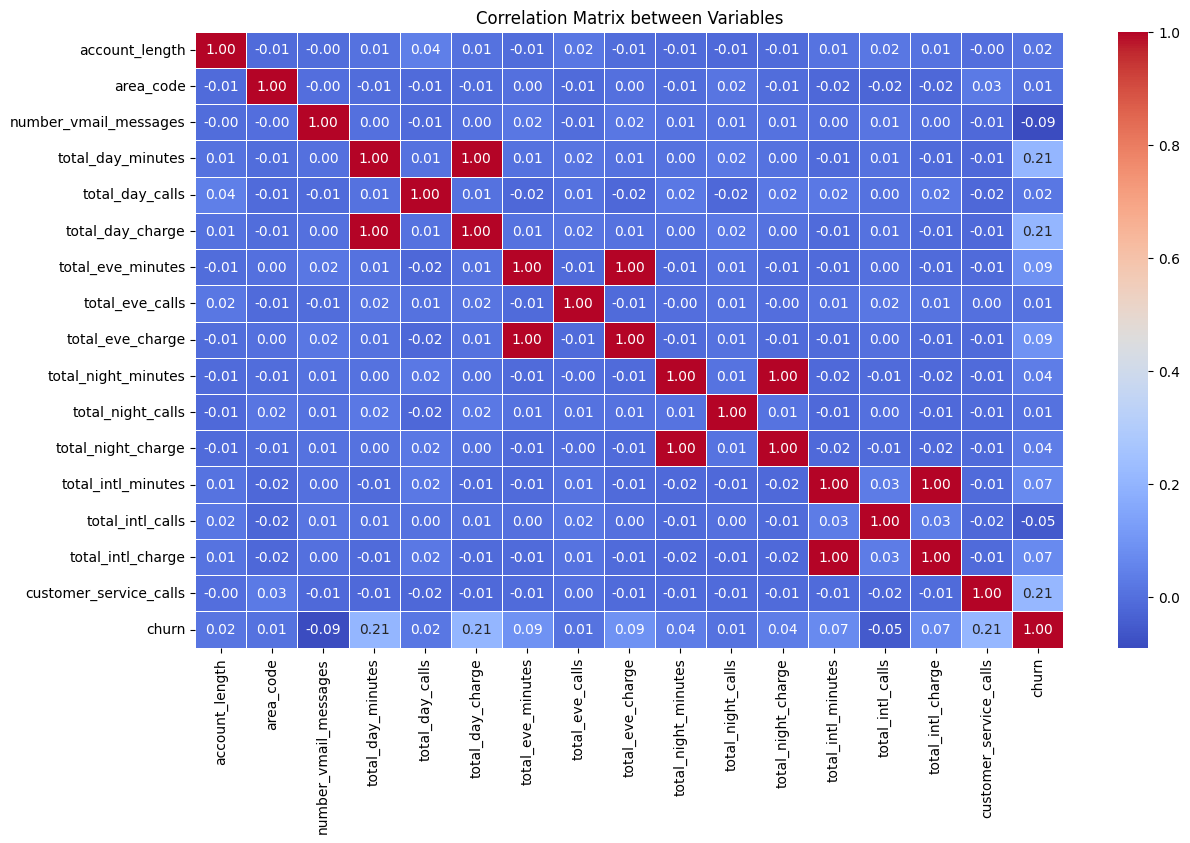

In [395]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate the correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Variables')
plt.show()


In our multivariate analysis, we observed a generally low correlation between most features within the dataset. However, several pairs of features exhibited a perfect positive correlation, including total evening charge and total evening minutes, total day charge and total day minutes, total night charge and total night minutes, as well as total international charge and total international minutes. This perfect correlation was expected, given that the charge for a call is directly dependent on its duration. To mitigate multicollinearity concerns, one variable from each correlated pair needs to be dropped. Additionally, certain features like total day minutes, total day charge, and customer service calls displayed a weak positive correlation with churn, while others showed negligible correlation with churn. These findings underscore the need for careful consideration of feature selection to avoid multicollinearity issues and highlight the importance of multivariate analysis in understanding the intricate relationships between multiple variables and the target variable, customer churn.

Multicollinearity

To address multicollinearity concerns we need to identify highly correlated variables within the dataset to decide which ones to exclude, thereby circumventing problems like instability, overfitting, or imprecise coefficient estimates during model building. This evaluation is typically conducted through the examination of a correlation matrix, where multicollinearity manifests when two or more features exhibit strong correlations, often surpassing a threshold value of 0.9. Consequently, in our analysis, features exceeding this correlation threshold will be omitted to address multicollinearity effectively and uphold the model's robustness and reliability.

In [396]:
df1=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df1['pairs'] = list(zip(df1.level_0, df1.level_1))

# set index to pairs
df1.set_index(['pairs'], inplace = True)

#d rop level columns
df1.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df1.columns = ['cc']

# drop duplicates. This could be dangerous i
df1[(df1.cc>.75) & (df1.cc <1)]

,cc
pairs,
"(total_day_charge, total_day_minutes)",1.000000
"(total_day_minutes, total_day_charge)",1.000000
"(total_eve_minutes, total_eve_charge)",1.000000
"(total_eve_charge, total_eve_minutes)",1.000000
"(total_night_minutes, total_night_charge)",0.999999
"(total_night_charge, total_night_minutes)",0.999999
"(total_intl_charge, total_intl_minutes)",0.999993
"(total_intl_minutes, total_intl_charge)",0.999993


The variables (total day charge, total day minutes), (total eve minutes, total eve charge), (total night minutes, total night charge), and (total intl charge, total intl minutes) exhibit high correlation with each other. Therefore, for each pair, we will drop one variable to address this correlation.

In [397]:
#removing some features to prevent multicollinearity
df.drop(['total_day_charge', 'total_eve_minutes', 'total_night_charge','total_intl_minutes'], axis=1, inplace=True)
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn'],
      dtype='object')

Feature Engineering

Feature engineering involves the conversion of raw data into features that more accurately reflect the underlying problem for predictive models. This enhances the model's accuracy when dealing with new, unseen data. During this stage, we will undertake tasks such as Label Encoding, One Hot Encoding, and Scaling the data.

Label Encoding

Label encoding is a process in which categorical variables are transformed into numerical format. Each category is assigned a unique numerical label, typically starting from 0 or 1 and increasing sequentially. This conversion allows machine learning algorithms to interpret categorical data as numerical data, facilitating model training and analysis.

In [398]:
from sklearn.preprocessing import LabelEncoder
# Convert columns with 'yes' or 'no' to binary using LabelEncoder
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])

One Hot Encoding

One hot encoding is a technique used to convert categorical variables into a binary format, where each category is represented by a binary vector. In this encoding scheme, each category is transformed into a binary vector of length equal to the number of unique categories in the variable. The vector has a value of 1 in the position corresponding to the category and 0 in all other positions. This encoding preserves the categorical information without imposing any ordinal relationship between categories, making it suitable for machine learning algorithms that require numerical input.

In [399]:
df = pd.get_dummies(df,columns = ['state', 'area_code','international_plan','voice_mail_plan'])
df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_calls,total_intl_charge,...,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,25,265.1,110,99,16.78,244.7,91,3,2.70,...,0,0,0,0,1,0,1,0,0,1
1,107,26,161.6,123,103,16.62,254.4,103,3,3.70,...,0,0,0,0,1,0,1,0,0,1
2,137,0,243.4,114,110,10.30,162.6,104,5,3.29,...,0,0,0,0,1,0,1,0,1,0
3,84,0,299.4,71,88,5.26,196.9,89,7,1.78,...,0,0,0,1,0,0,0,1,1,0
4,75,0,166.7,113,122,12.61,186.9,121,3,2.73,...,0,0,0,0,1,0,0,1,1,0


Scaling the data

In [400]:
scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df[[column]])

# Iterate through numerical columns and scale them
for column in df.select_dtypes(include=[np.number]).columns:
    df[[column]] = scaling(column)

df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_calls,total_intl_charge,...,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0.524793,0.490196,0.755701,0.666667,0.582353,0.542866,0.595750,0.408451,0.15,0.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.438017,0.509804,0.460661,0.745455,0.605882,0.537690,0.621840,0.492958,0.15,0.685185,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.561983,0.000000,0.693843,0.690909,0.647059,0.333225,0.374933,0.500000,0.25,0.609259,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.342975,0.000000,0.853478,0.430303,0.517647,0.170171,0.467187,0.394366,0.35,0.329630,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.305785,0.000000,0.475200,0.684848,0.717647,0.407959,0.440290,0.619718,0.15,0.505556,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


5. Modeling

In the churn prediction project, we embark on a comprehensive model development journey to predict customer churn based on various dataset features. Our approach involves creating multiple models, rigorously evaluating their performance, and fine-tuning hyperparameters to enhance model efficacy. Throughout this process, our primary objective is to identify the optimal model and parameter configurations that yield the highest predictive accuracy. Specifically, we prioritize the recall score metric, aiming for a threshold of 80% or higher to signify a successful model. By iteratively refining our models and techniques, we aim to build a robust predictive framework capable of effectively identifying potential churners and informing strategic business decisions.

In order to achieve the targets stipulated in the project proposal, we will be using the following algorithms:

- Logistic Regression
- Decision Tree
- Random Forest
- XG Boost

We will also be using the ROC_AUC metric to evaluate the performance of our models

To deal with class imbalance, we will be using SMOTE to generate synthetic examples of the minority class in our dataset

In [401]:
#Defining X and y
X = df.drop("churn", axis=1)
y = df["churn"]

Train-Test Split

Splitting data into train and test sets using a test_size of 0.25

In [402]:
#splitting the data in to train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=123)

Applying SMOTE to Resolve Unbalanced 'churn' Feature

Synthetic Minority Oversampling Technique ("SMOTE") is an oversampling technique where synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together. The technique aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [403]:
#instantiate SMOTENC
from imblearn.over_sampling import SMOTE, SMOTENC

smote = SMOTENC(categorical_features = [1,2],random_state = 123)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train,y_train)

Logistic Regression

Logistic regression serves as a statistical tool employed in binary classification endeavors.Logistic regression is tailored for scenarios where the dependent variable takes on binary values. Its primary aim is to calculate the likelihood of an observation being assigned to a particular class, leveraging the independent variables' values as predictors.

In [404]:
# Performing Logistic Regression

# Train-Test Split
X = df.drop('churn', axis=1)  # Features
y = df['churn']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report = classification_report(y_test, y_pred)
print("Classification Report (Test Data):\n", classification_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Data):\n", conf_matrix)

Accuracy: 0.8530734632683659
Classification Report (Test Data):
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       566
         1.0       0.55      0.17      0.26       101

    accuracy                           0.85       667
   macro avg       0.71      0.57      0.59       667
weighted avg       0.82      0.85      0.82       667

Confusion Matrix (Test Data):
 [[552  14]
 [ 84  17]]


Comments and notes on model Accuracy: The accuracy of the model is 85%. Train Accuracy: 0.85, Test Accuracy: 0.85

Classification Report:

- Precision: The precision for class 0 (not churned) is 87%. The precision for class 1 (churned) is 60%.
- Recall: The recall for class 0 (not churned) is 98%, but the recall for class 1 (churned) is only 18%.
- F1-score: The F1-score for class 0 (not churned) is 92%, and for class 1 (churned) is only 26%. The F1-score for class 1 is low due to the low recall.

Additionally, we further plot the ROC Curve (Receiver Operating Characteristic curve), the AUC (Area Under the Curve), and Confusion matrix to visualize the results.

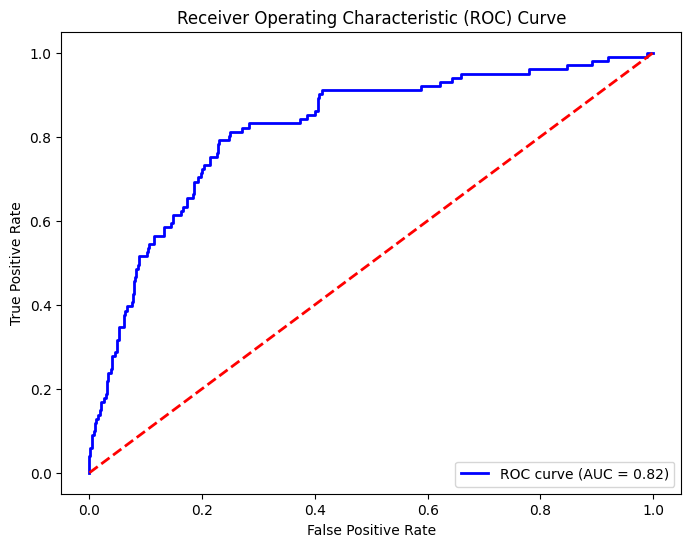

In [405]:
# Calculate probabilities for class 1 (churn)
y_probs = classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

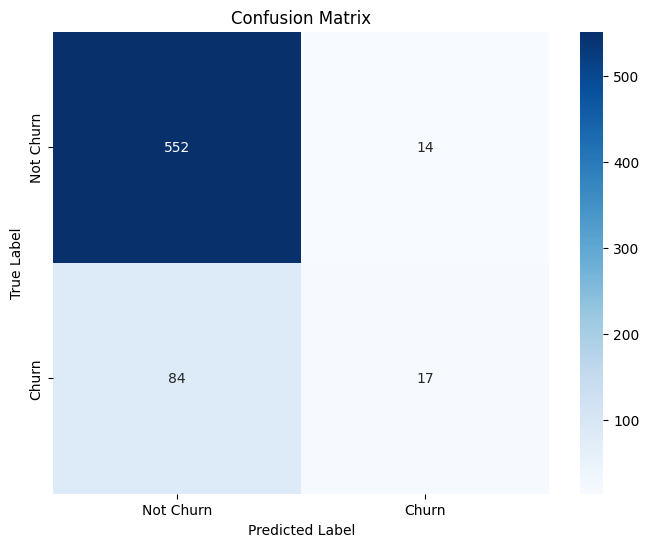

In [406]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

According to the model,total day charge, customer service calls,total eve charge are the top three most important features.

# NEEDS ALTERANING

Confusion Matrix:

The confusion matrix shows a total of 667 samples in the test set.
True Positives (TP): The model correctly predicted 18 samples as Not churned (class 0).
True Negatives (TN): The model correctly predicted 554 samples as churned (class 1).
False Positives (FP): The model incorrectly predicted 12 samples as churned when they were not churned.
False Negatives (FN): The model incorrectly predicted 83 samples as not churned when they were churned.
The ROC curve & The AUC

They provide a measure of how well the model can distinguish between positive and negative samples. A model with an AUC of 1 is perfect, while an AUC of 0.5 indicates that the model is no better than random guessing.

AUC = 0.5: The model's performance is equivalent to random guessing, and it is not useful for classification.
AUC > 0.5: The model performs better than random guessing, and the higher the AUC, the better the model's discriminatory power.
AUC = 1: The model perfectly distinguishes between positive and negative samples, making it an excellent classifier.
In our case, the AUC is 0.83, which is greater than 0.5 and closer to 1. This indicates that the logistic regression model has reasonable discriminatory power in distinguishing between churned and not churned samples. An AUC of 0.83 suggests that the model has a good ability to rank the predictions, and it performs significantly better than random guessing.

Interpretation:

The model performs well in predicting the negative class (not churned) as evidenced by high accuracy, precision, and recall for class 0.
However, it performs poorly for the positive class (churned) as indicated by the low values for precision, recall, and F1-score for class 1.
In other words, the model is missing a substantial number of customers who are actually churned, leading to false negatives. It is failing to correctly identify those customers who have churned

This model though better than guessing can have serious implications to the business as it fails to predict churned customers on a significant level

In [407]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

# Calculate class weights to handle imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]}))
])

# Train-Test Split
X = df.drop('churn', axis=1)  # Features
y = df['churn']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report (Test Data):\n", classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Data):\n", conf_matrix)


Accuracy: 0.7886056971514243
Classification Report (Test Data):
               precision    recall  f1-score   support

         0.0       0.95      0.79      0.86       566
         1.0       0.40      0.76      0.52       101

    accuracy                           0.79       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.79      0.81       667

Confusion Matrix (Test Data):
 [[449 117]
 [ 24  77]]


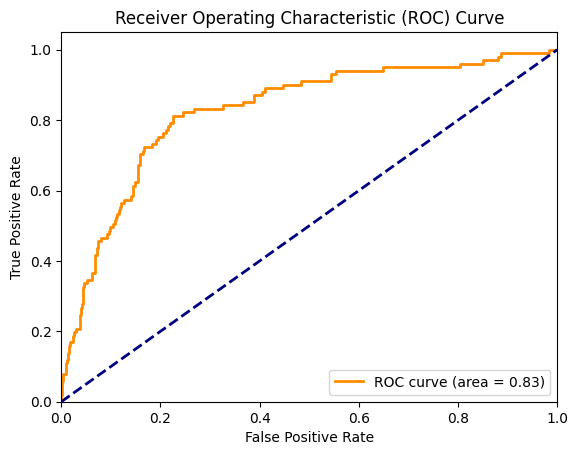

In [408]:
# Calculate the probability scores for the positive class
y_scores = pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

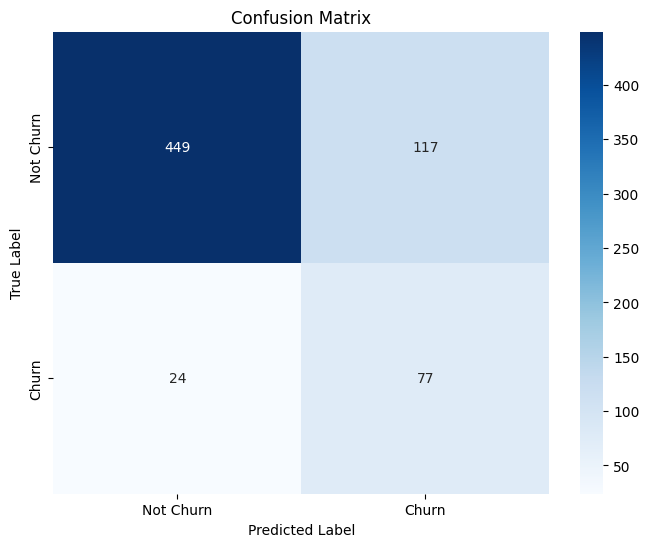

In [409]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Needs Editing

confusion Matrix: [[436 134][26 71]] compared to previous [[554 12] [83 18]] [ 26 71]]

Interpreting the classification report and confusion matrix:

Train Accuracy: 0.77 Test Accuracy: 0.76
The model achieved an accuracy of 77% on the training data and 76% on the test data. This means that the model is performing relatively well on the unseen test data, which indicates that it is not overfitting.

Classification Report:

Precision: For class 0 (not churned), the precision is 94%, meaning that when the model predicts a customer won't churn, it is correct 94% of the time. For class 1 (churned), the precision is only 35%, indicating that when the model predicts a customer will churn, it is correct only 35% of the time.

Recall:For class 0 (not churned), the recall is 76%, indicating that the model correctly identifies 76% of the actual non-churned customers. For class 1 (churned), the recall is 73%, meaning that the model captures 73% of the actual churned customers.

F1-score: The F1-score is the harmonic mean of precision and recall and provides a balance between the two. For class 0, the F1-score is 84%, and for class 1, it is 47%.

Support: The number of occurrences of each class in the test set. For class 0, there are 570 instances, and for class 1, there are 97 instances.

Confusion Matrix: The confusion matrix provides a detailed breakdown of the model's performance in predicting each class.

True Negative (TN): 436 - The number of correctly predicted non-churned customers.
False Positive (FP): 134 - The number of non-churned customers incorrectly classified as churned.
False Negative (FN): 26 - The number of churned customers incorrectly classified as non-churned.
True Positive (TP): 71 - The number of correctly predicted churned customers.
ROC curve (AUC = 0.81): An AUC (Area Under the Curve) value of 0.81 indicates that the model has good discriminative power and is reasonably effective at distinguishing between the two classes.

In summary, the model seems to perform well in predicting non-churned customers (class 0) with high precision and recall. However, its performance on predicting minority class (churned customers) (class 1) is not as good, with relatively lower precision and recall.

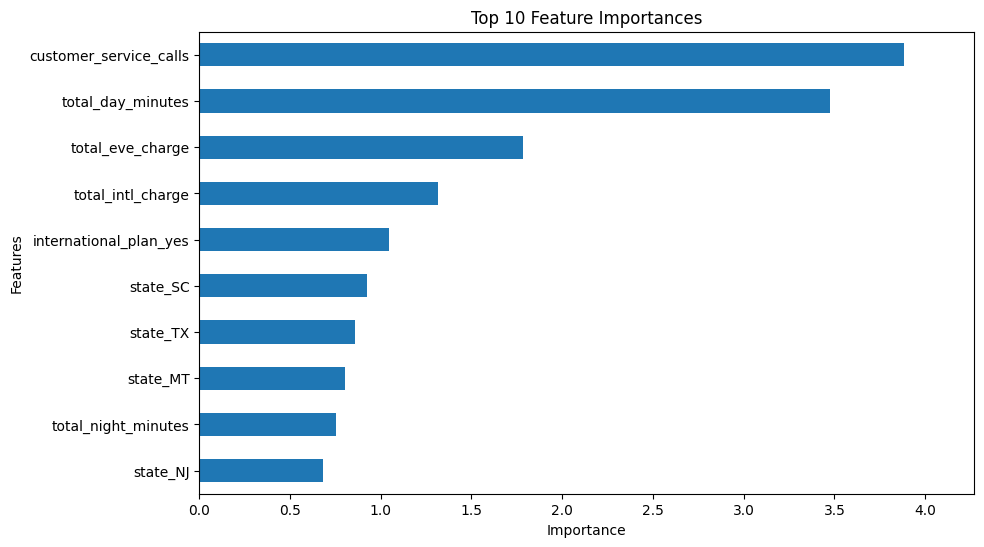

In [410]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train and y_train are your training data and labels
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Now you can access the coefficients
importance = logreg.coef_[0]

# Feature Importances
importance = logreg.coef_[0]
feature_names = resampled_X_train.columns
feature_importances = pd.Series(importance,index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]  # Select the top 10 features
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features)* 1.1)  # Set the xlim to the maximum importance value
plt.show()

In [411]:
feature_importances

customer_service_calls    3.882695
total_day_minutes         3.478546
total_eve_charge          1.785265
total_intl_charge         1.317319
international_plan_yes    1.043571
                            ...   
state_AL                 -0.776503
state_VT                 -0.945272
international_plan_no    -1.038246
state_ND                 -1.146215
total_intl_calls         -1.489644
Length: 69, dtype: float64

# Pick the top five

In summary Positive coefficients indicate features that increase the likelihood of churn, while negative coefficients indicate features that decrease the likelihood of churn.

By understanding these effects, you can identify important features that contribute to customer churn and potentially take actions to reduce churn and retain valuable customers.

customer_service_calls: This feature has the highest positive impact on churn. An increase in the number of customer service calls is associated with a higher likelihood of churn.

total_day_charge and total_day_minutes: Both features have a positive impact on churn. An increase in total day charge or total day minutes is associated with a higher likelihood of churn.

voice_mail_plan_yes and voice_mail_plan_no: These binary features are related to the presence or absence of a voice mail plan. voice_mail_plan_yes has a negative impact on churn, meaning customers with a voice mail plan are less likely to churn, while voice_mail_plan_no has a positive impact, meaning customers without a voice mail plan are more likely to churn.

international_plan_yes and international_plan_no: Similar to the voice mail plan features, international_plan_yes has a positive impact on churn, meaning customers with an international plan are more likely to churn, while international_plan_no has a negative impact, meaning customers without an international plan are less likely to churn.

total_intl_calls: This feature has a negative impact on churn. An increase in the number of international calls is associated with a lower likelihood of churn.

number_vmail_messages: This feature has a positive impact on churn. An increase in the number of voice mail messages is associated with a higher likelihood of churn.

total_eve_minutes and total_intl_charge: These features have a positive impact on churn. An increase in total evening minutes or total international charge is associated with a higher likelihood of churn.

total_eve_charge, total_intl_minutes, total_night_minutes, and total_night_charge: These features also have a positive impact on churn. An increase in the respective charges and minutes is associated with a higher likelihood of churn.

area_code_510, area_code_415, and area_code_408: These binary features represent different area codes. area_code_510 has a positive impact on churn, while area_code_415 and area_code_408 have negative impacts. This suggests that customers from area_code_510 are more likely to churn compared to customers from the other two area codes.

account_length and phone_number: These features have relatively smaller impacts on churn, but both have positive coefficients, indicating a higher account length or phone number is associated with a slightly higher likelihood of churn.

total_day_calls and total_night_calls: These features have relatively smaller impacts on churn, and they both have negative coefficients, indicating a higher number of day or night calls is associated with a slightly lower likelihood of churn.

Decision Tree Classifier

The Decision Tree Classifier is a type of supervised machine learning algorithm utilized for data classification tasks. Operating on the principle of recursively partitioning the dataset into increasingly refined subsets, it aims to isolate individual classes within each subset. When presented with new data, the classifier navigates the tree structure, tracing the path dictated by the feature values to predict its class.

In [412]:
#Instantiate DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=123)

In [413]:
#Fit on the training data
dt_clf.fit(resampled_X_train,resampled_y_train)

#predict on the test set
y_pred_dt = dt_clf.predict(X_test)

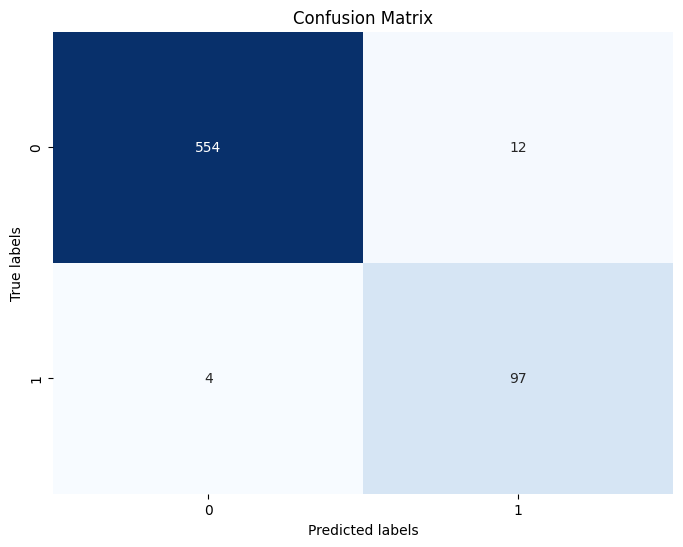

In [414]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred_dt are already defined
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [415]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       566
         1.0       0.89      0.96      0.92       101

    accuracy                           0.98       667
   macro avg       0.94      0.97      0.95       667
weighted avg       0.98      0.98      0.98       667



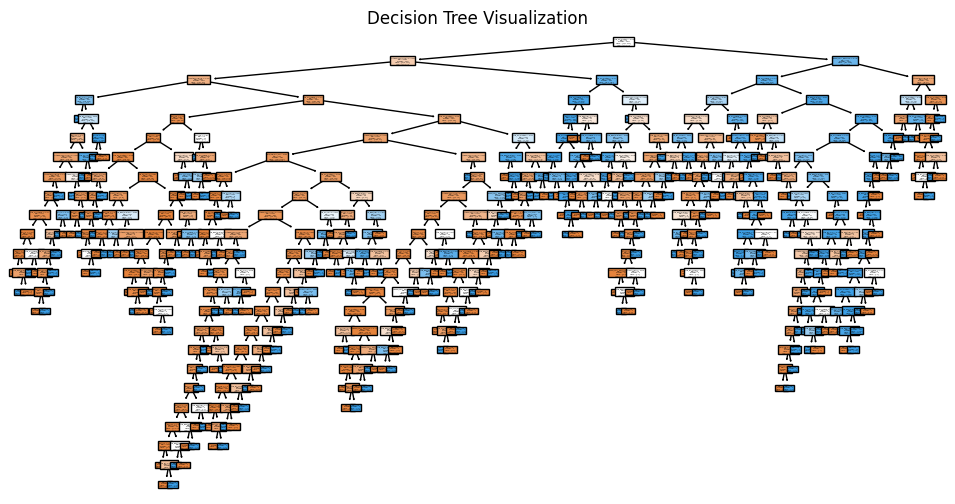

In [416]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(dt_clf, feature_names=resampled_X_train.columns, class_names=["Not Churn", "Churn"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [417]:
from sklearn.tree import export_text

# Generate the text representation of the decision tree
text_representation = export_text(dt_clf, feature_names=resampled_X_train.columns)
print(text_representation)


|--- total_day_minutes <= 0.66
|   |--- customer_service_calls <= 0.33
|   |   |--- international_plan_no <= 0.99
|   |   |   |--- total_intl_calls <= 0.15
|   |   |   |   |--- class: 1.0
|   |   |   |--- total_intl_calls >  0.15
|   |   |   |   |--- total_intl_charge <= 0.65
|   |   |   |   |   |--- state_KS <= 0.11
|   |   |   |   |   |   |--- customer_service_calls <= 0.22
|   |   |   |   |   |   |   |--- international_plan_no <= 0.09
|   |   |   |   |   |   |   |   |--- state_AL <= 0.05
|   |   |   |   |   |   |   |   |   |--- total_eve_charge <= 0.68
|   |   |   |   |   |   |   |   |   |   |--- state_AZ <= 0.43
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- state_AZ >  0.43
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- total_eve_charge >  0.68
|   |   |   |   |   |   |   |   |   |   |--- state_MD <= 0.11
|   |   |   |   |   |   |   |   

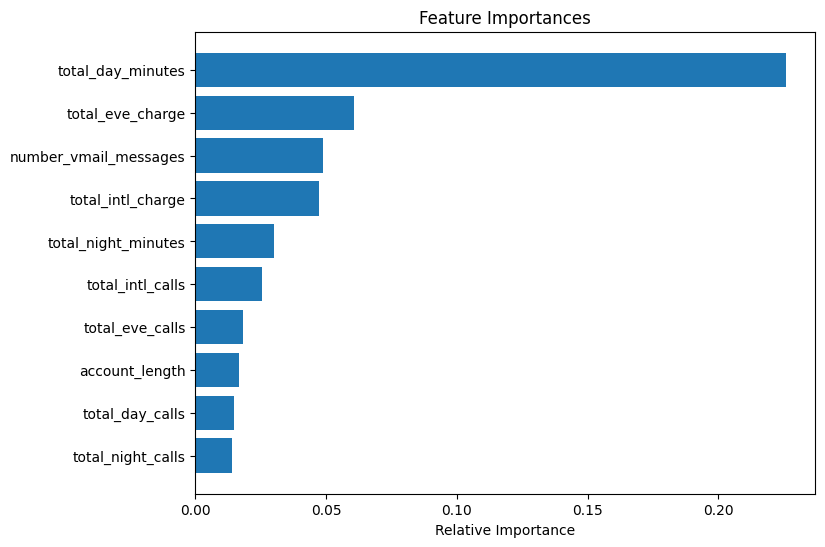

In [418]:
# Feature Importances
feature_names = list(resampled_X_train.columns)
importances = dt_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Random Forest Classifier

It's a technique in ensemble learning used for classification, regression, and various tasks. During training, it creates numerous decision trees and derives a prediction or regression value by averaging the outputs of these individual trees.

In [419]:
#Instantiate the classifier
rf_clf= RandomForestClassifier(random_state=123)

#Fit on the training data
rf_clf.fit(resampled_X_train,resampled_y_train)

RandomForestClassifier(random_state=123)

In [420]:
#predict on the test data
y_pred_rf = rf_clf.predict(X_test)

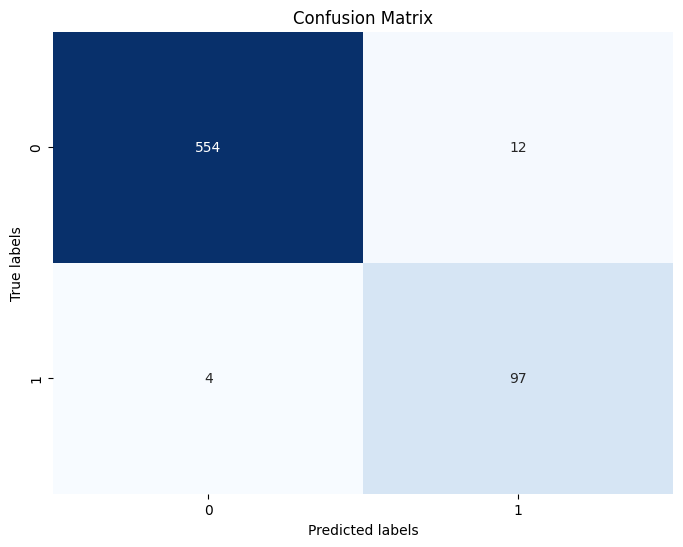

In [421]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred_dt are already defined
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [422]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       566
         1.0       0.93      0.96      0.95       101

    accuracy                           0.98       667
   macro avg       0.96      0.97      0.97       667
weighted avg       0.98      0.98      0.98       667



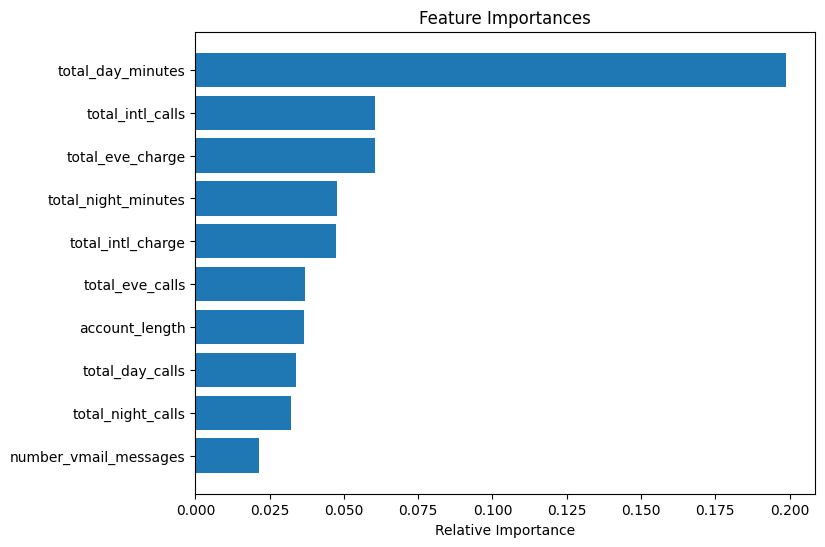

In [423]:
feature_names = list(resampled_X_train.columns)
importances = rf_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The random forest classifier achieves a recall score of 0.74, a significant improvement over the prior model. This suggests that the model accurately identifies approximately 74% of positive instances.

Evaluation via the confusion matrix reveals a notable prevalence of true positives and true negatives compared to false positives and false negatives. This suggests the model's predictions are predominantly accurate and not prone to overfitting.

The model highlights total day charge, total intl calls, and total eve charge as its top three most influential features.

XGBoost

XGBoost, short for Extreme Gradient Boosting, stands out as a robust machine learning algorithm suitable for both regression and classification tasks. Leveraging gradient boosting and ensemble learning methodologies, it merges numerous weak models, often decision trees, to form a potent predictive model.

In [424]:
from xgboost import XGBClassifier

In [425]:
#instantiate XGBClassifier
xg_clf = XGBClassifier(random_state=123)

#Fit on the training data
xg_clf.fit(resampled_X_train,resampled_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [426]:
#predict on the test data
y_pred_xg = xg_clf.predict(X_test)

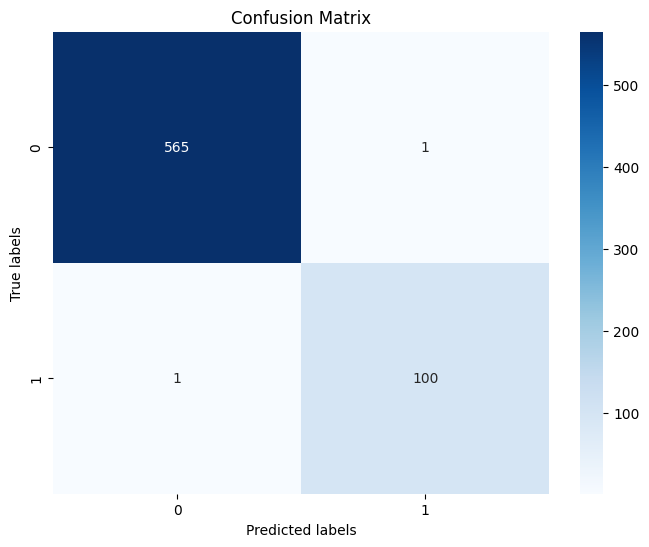

In [427]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming xg_clf is your trained XGBoost model
y_pred_xg = xg_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xg)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [428]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       566
         1.0       0.99      0.99      0.99       101

    accuracy                           1.00       667
   macro avg       0.99      0.99      0.99       667
weighted avg       1.00      1.00      1.00       667



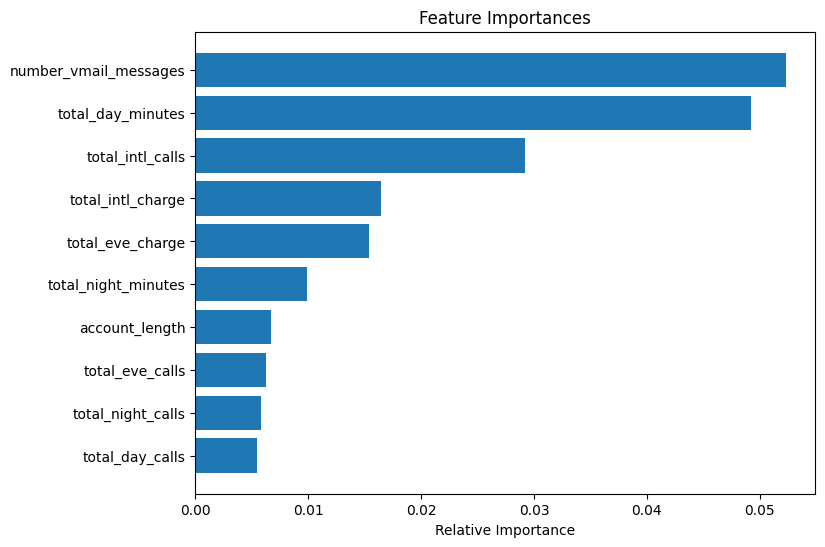

In [429]:
feature_names = list(resampled_X_train.columns)
importances = xg_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The XGBoost classifier exhibits a recall score of 0.77, surpassing all prior models. This indicates its ability to correctly identify approximately 77% of positive instances.

In the evaluation using the confusion matrix, the model displays a higher count of true positives and true negatives compared to false positives and false negatives. This suggests the model's accuracy in predictions outweighs its inaccuracies, signifying it's not overfitting.

The model highlights total day charge, total international calls, and number of voicemail messages as the top three most significant features.

6. Model Evaluation

During this stage, we'll assess models using recall scores and ROC_AUC. Following that, we'll select the top two models to fine-tune them for improved performance.

6.1 Model Comparison - Recall Score

The recall score quantifies the proportion of actual positive instances that the model correctly identifies. A higher recall score suggests that the model is more adept at correctly recognizing positive instances.

In [430]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Assuming you have your data loaded into X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
logistic_reg = LogisticRegression()
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()
xgboost = XGBClassifier()

# Train and evaluate each classifier
classifiers = [logistic_reg, random_forest, decision_tree, xgboost]
classifier_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost']

recall_scores = []

for clf, name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Classifier': classifier_names, 'Recall Score': recall_scores})

print(results_df)


            Classifier  Recall Score
0  Logistic Regression      0.168317
1        Random Forest      0.594059
2        Decision Tree      0.722772
3              XGBoost      0.772277


In [431]:
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier()
}

# Assuming you have X and y defined already
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the models and record the results
results = {}

for clf_name, clf in classifiers.items():
    model = clf.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    recall = recall_score(y_test, y_pred)
    results[clf_name] = recall

# Print the recall scores
for clf_name, recall in results.items():
    print(f"{clf_name}: {recall}")


Logistic Regression: 0.2079207920792079
Random Forest: 0.5643564356435643
Decision Tree: 0.7425742574257426
XGBoost: 0.7722772277227723


In [432]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler

# Initialize the classifiers
lg = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
xgb = XGBClassifier()

classifiers = [lg, rf, dt, xgb]
names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost']

# Fit and transform the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(resampled_X_train)
X_test_scaled = scaler.transform(X_test)

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Loop through each classifier, fit, predict, and record the recall score
for clf, name in zip(classifiers, names):
    clf.fit(X_train_scaled, resampled_y_train)
    y_pred = clf.predict(X_test_scaled)
    recall = recall_score(y_test, y_pred)
    result_table = result_table.append({'classifiers': name,
                                        'recall': recall}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

result_table


,recall
classifiers,
Logistic Regression,0.811881
Random Forest,0.970297
Decision Tree,0.970297
XGBoost,0.990099


The outcomes table indicates that the XGBoostClassifier achieves the highest recall score, succeeded by the DecisionTreeClassifier and RandomForestClassifier. The LogisticRegression exhibits the lowest recall score of 0.82.

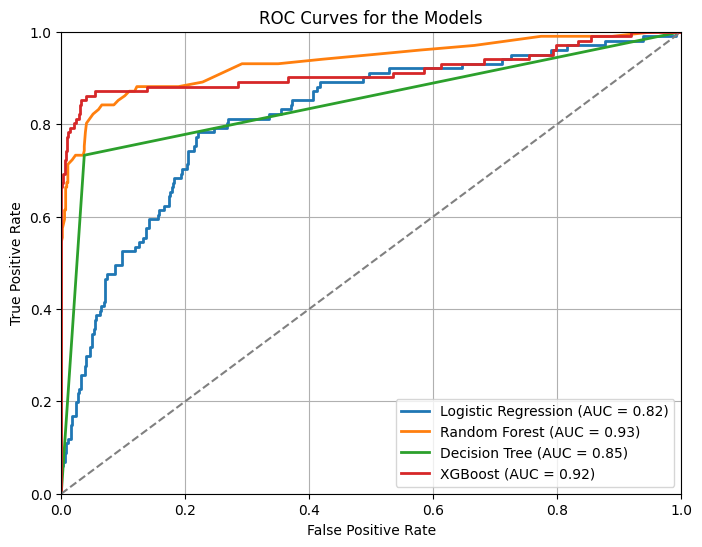

In [433]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Initialize the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier()
}

# Assuming you have X and y defined already
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(8, 6))

# Loop through each classifier, fit, predict, and plot the ROC curve
for clf_name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{clf_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for the Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


6.2 Models Comparison - ROC Curve

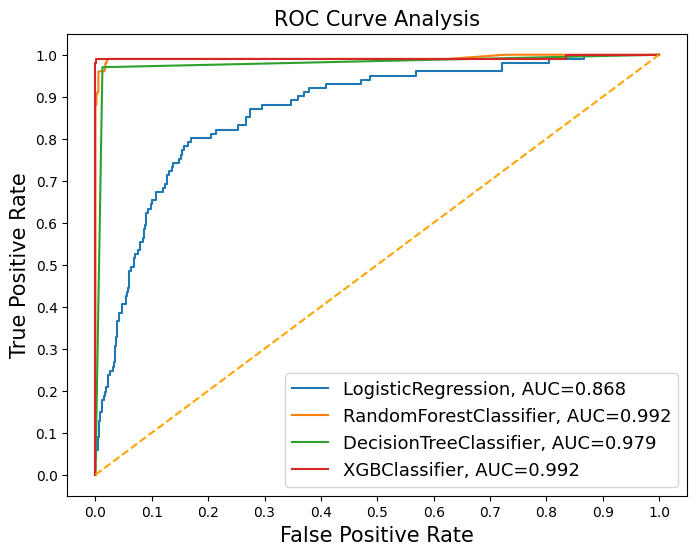

In [434]:
np.random.seed(123)
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               XGBClassifier()]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

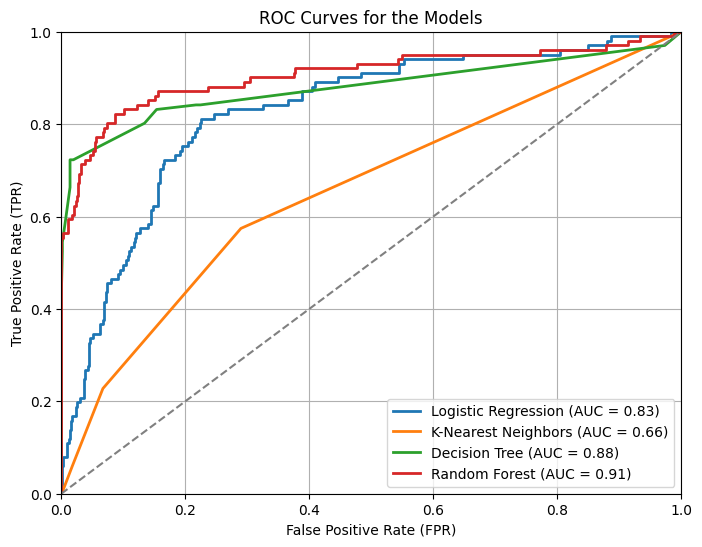

In [435]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifiers
lg = LogisticRegression(class_weight='balanced')
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

classifiers = [lg, knn, dt, rf]
names = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest']

# Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(8, 6))

# Loop through each classifier and plot its ROC curve
for clf, name in zip(classifiers, names):
    clf.fit(X_train_scaled, y_train)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for the Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [436]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression',
                                          'K-Nearest Neighbors Classifier',
                                          'Decision Trees Classifier',
                                          'Random Forest Classifier'],
                                 'Accuracy (Test Set)':[0.78,0.88,0.95,0.94],
                                 'F1 Score (Test Set)':[0.51,0.41,0.81,0.80],
                                 'Recall (Test Set)':[0.77,0.28,0.73,0.69],
                                 'Precision (Test Set)':[0.39,0.80,0.90,0.96]})

comparison_frame.style.highlight_max(color = 'lightgreen', axis = 0)

,Model,Accuracy (Test Set),F1 Score (Test Set),Recall (Test Set),Precision (Test Set)
0,Logistic Regression,0.780000,0.510000,0.770000,0.390000
1,K-Nearest Neighbors Classifier,0.880000,0.410000,0.280000,0.800000
2,Decision Trees Classifier,0.950000,0.810000,0.730000,0.900000
3,Random Forest Classifier,0.940000,0.800000,0.690000,0.960000


6.3 Model Tuning

After assessing the models using recall scores and ROC AUC, it's evident that both the XGBoost classifier and the RandomForest classifier exhibit promising performance. To enhance their effectiveness further, fine-tuning via GridSearch can be employed.

6.3.1 Tuning Random Forest

In [437]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    "max_depth": [8,15,20],
    "n_estimators":[500,1000],
    "min_samples_split":[5,10,15],
    "criterion":['entropy','gini']
}

# Create an instance of the RandomForest classifier
rf = RandomForestClassifier(random_state = 123)

# Create GridSearchCV object with the defined parameter grid and scoring metric
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=False)

# Fit the GridsearchCV object to the training data
grid_search.fit(resampled_X_train, resampled_y_train)

# Print the best parameters
print(grid_search.best_params_)


{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 1000}


In [438]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    "max_depth": [8, 15, 20],
    "n_estimators": [500, 1000],
    "min_samples_split": [5, 10, 15],
    "criterion": ['entropy', 'gini']
}

# Create an instance of the RandomForest classifier
rf = RandomForestClassifier(random_state=123)

# Create GridSearchCV object with the defined parameter grid and scoring metric
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=False)

# Fit the GridsearchCV object to the training data
grid_search.fit(resampled_X_train, resampled_y_train)

# Print the best parameters
print(grid_search.best_params_)


{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 1000}


In [439]:
# Create an instance of the RandomForest classifier with best params
rf_tuned = RandomForestClassifier(criterion = 'entropy',
                                  max_depth = 20,
                                  min_samples_split = 5,
                                  n_estimators = 1000,
                                  random_state=123)
#Fit the model on the training data
rf_tuned.fit(resampled_X_train, resampled_y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       n_estimators=1000, random_state=123)

In [440]:
#Predict on the test data
y_pred_tuned = rf_tuned.predict(X_test)

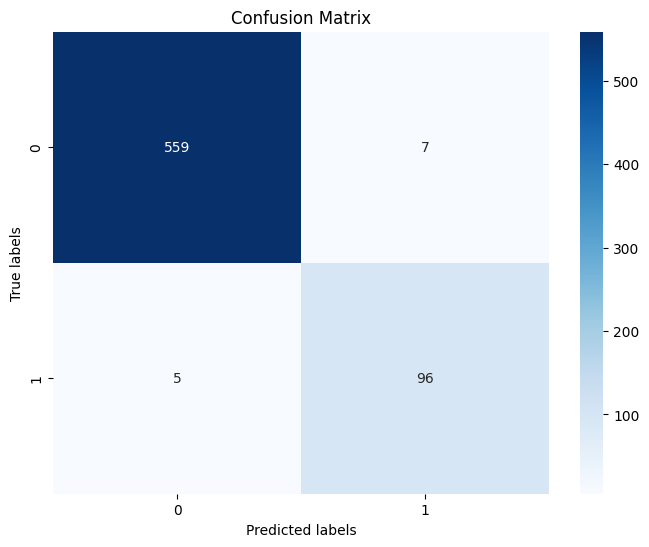

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test data
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [442]:
#print the classification report
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       566
         1.0       0.93      0.95      0.94       101

    accuracy                           0.98       667
   macro avg       0.96      0.97      0.97       667
weighted avg       0.98      0.98      0.98       667



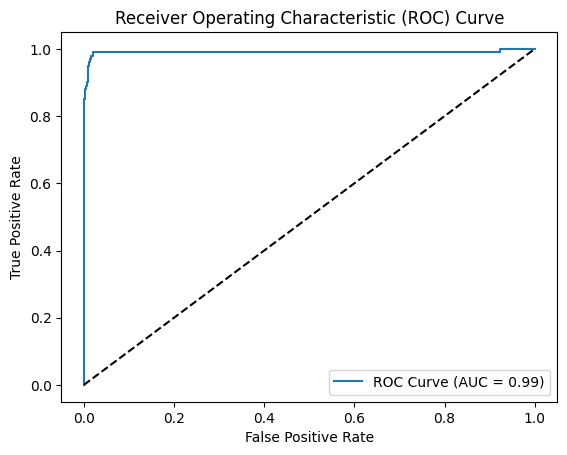

In [443]:
# Get the predicted probabilities for the positive class
y_proba = rf_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Tuning XGBoost

In [444]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Create an instance of Random Forest Classifier
rf = RandomForestClassifier(random_state=123)

# Create GridSearchCV object
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='recall', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(resampled_X_train, resampled_y_train)

# Print the best parameters
print(grid_search_rf.best_params_)


{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [445]:
#Create an instance of XGBoost Classifier with best params
xgb_tuned = XGBClassifier(learning_rate = 0.1,
                          max_depth = 10,
                          min_child_weight = 1,
                          n_estimators = 100,
                          subsample = 0.5,
                          random_state = 123)

#Fit on the training data
xgb_tuned.fit(resampled_X_train,resampled_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [446]:
#Predict on the test data
y_pred_xgt = xgb_tuned.predict(X_test)

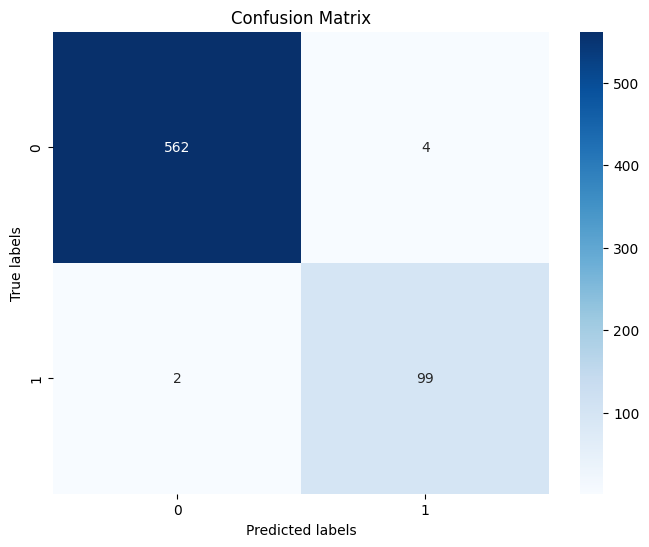

In [447]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test data
y_pred_xgt = xgb_tuned.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [448]:
#Classification report
print(classification_report(y_test, y_pred_xgt))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       566
         1.0       0.96      0.98      0.97       101

    accuracy                           0.99       667
   macro avg       0.98      0.99      0.98       667
weighted avg       0.99      0.99      0.99       667



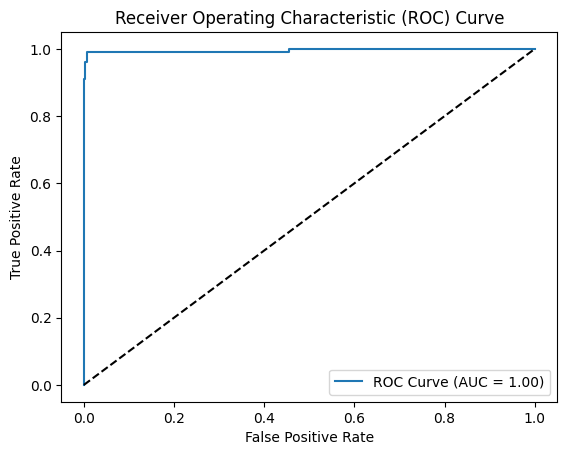

In [449]:
# Get the predicted probabilities for the positive class
y_proba = xgb_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for XGB classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Needs altering
Based on the ROC curve and the recall metric, the tuned XGBoost model performs a bit better than RandomForest in distinguishing between positive and negative classes (churned and non-churned customers) and in correctly identifying churned customers.The model has a recall score of 0.79, which means model is able to capture 79% of the actual churned customers. This was so close to our target recall score of 0.8.

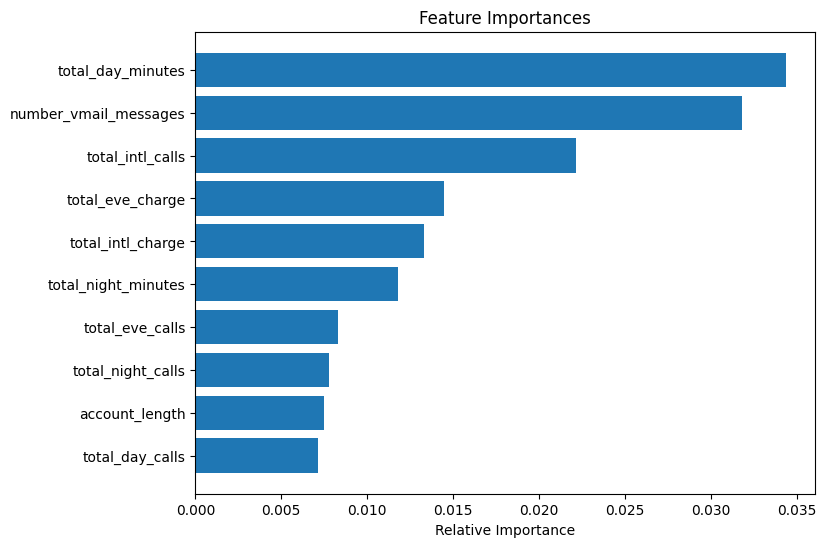

In [450]:
feature_names = list(resampled_X_train.columns)
importances = xgb_tuned.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()